In [ ]:
###### Importing all used packages
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from pandas import set_option
# set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

###### Import packages needed for the make_vars functions
import features as FE

##### import stuff from scikit learn
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score,LeavePGroupsOut, LeaveOneGroupOut, cross_val_predict
from sklearn.metrics import confusion_matrix, make_scorer, f1_score, accuracy_score, recall_score, precision_score
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier

filename = 'facies_PE_ET.csv'
training_data = pd.read_csv(filename)
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [ ]:
##### cD From wavelet db1
dwt_db1_cD_df = FE.make_dwt_vars_cD(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db1')

##### cA From wavelet db1
dwt_db1_cA_df = FE.make_dwt_vars_cA(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db1')

##### cD From wavelet db3
dwt_db3_cD_df = FE.make_dwt_vars_cD(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db3')

##### cA From wavelet db3
dwt_db3_cA_df = FE.make_dwt_vars_cA(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db3')

##### From entropy
entropy_df = FE.make_entropy_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                               l_foots=[2, 3, 4, 5, 7, 10])

###### From gradient
gradient_df = FE.make_gradient_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                 dx_list=[2, 3, 4, 5, 6, 10, 20])

In [ ]:
##### From rolling average
moving_av_df = FE.make_moving_av_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                   windows=[1, 2, 5, 10, 20])

In [ ]:
##### From rolling standard deviation
moving_std_df = FE.make_moving_std_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                     windows=[3 , 4, 5, 7, 10, 15, 20])

In [ ]:
##### From rolling max
moving_max_df = FE.make_moving_max_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                     windows=[3, 4, 5, 7, 10, 15, 20])

In [ ]:
##### From rolling min
moving_min_df = FE.make_moving_min_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                     windows=[3 , 4, 5, 7, 10, 15, 20])

In [ ]:
###### From rolling NM/M ratio
rolling_marine_ratio_df = FE.make_rolling_marine_ratio_vars(wells_df=training_data, windows=[5, 10, 15, 20, 30, 50, 75, 100, 200])

In [ ]:
###### From distance to NM and M, up and down
dist_M_up_df = FE.make_distance_to_M_up_vars(wells_df=training_data)
dist_M_down_df = FE.make_distance_to_M_down_vars(wells_df=training_data)
dist_NM_up_df = FE.make_distance_to_NM_up_vars(wells_df=training_data)
dist_NM_down_df = FE.make_distance_to_NM_down_vars(wells_df=training_data)

In [ ]:
list_df_var = [dwt_db1_cD_df, dwt_db1_cA_df, dwt_db3_cD_df, dwt_db3_cA_df,
               entropy_df, gradient_df, moving_av_df, moving_std_df, moving_max_df, moving_min_df,
              rolling_marine_ratio_df, dist_M_up_df, dist_M_down_df, dist_NM_up_df, dist_NM_down_df]
combined_df = training_data
for var_df in list_df_var:
    temp_df = var_df
    combined_df = pd.concat([combined_df,temp_df],axis=1)
combined_df.replace(to_replace=np.nan, value='-1', inplace=True)
print (combined_df.shape)
combined_df.head(5)

(4149, 299)


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_cD_level_1,GR_cD_level_2,GR_cD_level_3,GR_cD_level_4,ILD_log10_cD_level_1,ILD_log10_cD_level_2,ILD_log10_cD_level_3,ILD_log10_cD_level_4,DeltaPHI_cD_level_1,DeltaPHI_cD_level_2,DeltaPHI_cD_level_3,DeltaPHI_cD_level_4,PE_cD_level_1,PE_cD_level_2,PE_cD_level_3,PE_cD_level_4,PHIND_cD_level_1,PHIND_cD_level_2,PHIND_cD_level_3,PHIND_cD_level_4,GR_cA_level_1,GR_cA_level_2,GR_cA_level_3,GR_cA_level_4,ILD_log10_cA_level_1,ILD_log10_cA_level_2,ILD_log10_cA_level_3,ILD_log10_cA_level_4,DeltaPHI_cA_level_1,...,ILD_log10_moving_min_4ft,ILD_log10_moving_min_5ft,ILD_log10_moving_min_7ft,ILD_log10_moving_min_10ft,ILD_log10_moving_min_15ft,ILD_log10_moving_min_20ft,DeltaPHI_moving_min_3ft,DeltaPHI_moving_min_4ft,DeltaPHI_moving_min_5ft,DeltaPHI_moving_min_7ft,DeltaPHI_moving_min_10ft,DeltaPHI_moving_min_15ft,DeltaPHI_moving_min_20ft,PE_moving_min_3ft,PE_moving_min_4ft,PE_moving_min_5ft,PE_moving_min_7ft,PE_moving_min_10ft,PE_moving_min_15ft,PE_moving_min_20ft,PHIND_moving_min_3ft,PHIND_moving_min_4ft,PHIND_moving_min_5ft,PHIND_moving_min_7ft,PHIND_moving_min_10ft,PHIND_moving_min_15ft,PHIND_moving_min_20ft,Marine_ratio_5_centered,Marine_ratio_10_centered,Marine_ratio_15_centered,Marine_ratio_20_centered,Marine_ratio_30_centered,Marine_ratio_50_centered,Marine_ratio_75_centered,Marine_ratio_100_centered,Marine_ratio_200_centered,dist_M_up,dist_M_down,dist_NM_up,dist_NM_down
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,-0.572756,-4.72,8.110515,-1.625,0.002121,0.006,0.035355,0.1675,-3.040559,-2.3,-2.404163,0.125,0.353553,0.8,0.565685,0.65,-0.459619,-0.8425,-1.375323,-2.25125,110.103597,160.43,218.771767,311.015,0.936916,1.319,1.829992,2.4205,17.041273,...,0.661,0.658,0.655,0.647,0.625,0.615,9.9,9.9,9.9,9.9,9.9,9.9,9.9,4.1,4.1,3.6,3.5,3.4,3.4,3.4,11.915,11.915,11.915,11.915,11.915,11.915,11.915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.140000,1.510000,-1.0,21.5,0.0,0.0
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,-0.572756,-4.72,8.110515,-1.625,0.002121,0.006,0.035355,0.1675,-3.040559,-2.3,-2.404163,0.125,0.353553,0.8,0.565685,0.65,-0.459619,-0.8425,-1.375323,-2.25125,110.103597,160.43,218.771767,311.015,0.936916,1.319,1.829992,2.4205,17.041273,...,0.658,0.655,0.647,0.636,0.624,0.600,9.9,9.9,9.9,9.9,9.9,9.9,9.9,3.6,3.6,3.5,3.4,3.4,3.4,3.4,11.915,11.915,11.915,11.915,11.915,11.915,11.915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.156863,1.504950,-1.0,21.0,0.0,0.0
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,-4.985103,-4.72,8.110515,-1.625,0.002121,0.006,0.035355,0.1675,0.636396,-2.3,-2.404163,0.125,0.070711,0.8,0.565685,0.65,-0.045962,-0.8425,-1.375323,-2.25125,116.778685,160.43,218.771767,311.015,0.928431,1.319,1.829992,2.4205,20.293965,...,0.655,0.647,0.636,0.630,0.615,0.583,13.9,9.9,9.9,9.9,9.9,9.9,9.9,3.5,3.5,3.4,3.4,3.4,3.4,3.4,12.565,11.915,11.915,11.915,11.915,11.915,11.915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.173077,1.500000,-1.0,20.5,0.0,0.0
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,-4.985103,-0.41,8.110515,-1.625,0.002121,0.014,0.035355,0.1675,0.636396,-2.3,-2.404163,0.125,0.070711,-0.1,0.565685,0.65,-0.045962,-0.5825,-1.375323,-2.25125,116.778685,148.96,218.771767,311.015,0.928431,1.269,1.829992,2.4205,20.293965,...,0.647,0.636,0.630,0.625,0.600,0.561,13.5,13.5,13.5,9.9,9.9,9.9,9.9,3.4,3.4,3.4,3.4,3.4,3.4,3.4,13.050,12.565,12.565,11.915,11.915,11.915,11.915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.188679,1.495146,-1.0,20.0,0.0,0.0
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,0.431335,-0.41,8.110515,-1.625,0.007778,0.014,0.035355,0.1675,-0.353553,-2.3,-2.404163,0.125,-0.141421,-0.1,0.565685,0.65,-0.060104,-0.5825,-1.375323,-2.25125,105.040712,148.96,218.771767,311.015,0.907218,1.269,1.829992,2.4205,19.445436,...,0.636,0.630,0.625,0.624,0.583,0.537,13.5,13.5,13.5,13.5,9.9,9.9,9.9,3.4,3.4,3.4,3.4,3.4,3.4,3.4,13.115,13.050,13.050,12.565,11.915,11.915,11.915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.203704,1.490385,-1.0,19.5,0

In [ ]:
X = combined_df.iloc[:, 4:]
y = combined_df['Facies']
groups = combined_df['Well Name']

In [ ]:
#combined_df
#combined_df.to_csv('E4facies.csv')

In [ ]:
Cl = RandomForestClassifier(n_estimators=100, max_features=0.1, min_samples_leaf=25,
                            min_samples_split=50, class_weight='balanced', random_state=42, n_jobs=-1)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)

methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

scores = []

for method in methods:
    
    cv=lpgo.split(X, y, groups)
    validated = cross_val_score(method, X, y, scoring="f1_weighted", cv=cv, n_jobs=-1)
    scores.append(validated)
    
scores = np.array(scores)
scores = np.swapaxes(scores, 0, 1)
scores = pd.DataFrame(data=scores, columns=method_list)

Text(0.5, 1.0, 'Classification scores for tuned parameters')

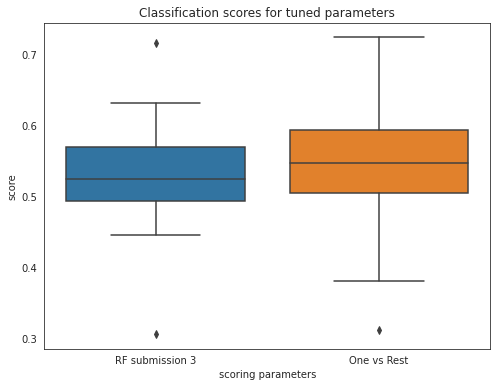

In [ ]:
sns.set_style('white')
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=scores,whis=1.5)
plt.xlabel('scoring parameters')
plt.ylabel('score')
plt.title('Classification scores for tuned parameters')

In [ ]:
filename = 'validation_data_nofacies.csv'
test_data = pd.read_csv(filename)
test_data.head(5)

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,A1 SH,STUART,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000
1,A1 SH,STUART,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978
2,A1 SH,STUART,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956
3,A1 SH,STUART,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933
4,A1 SH,STUART,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911


In [ ]:
##### cD From wavelet db1
dwt_db1_cD_df = FE.make_dwt_vars_cD(wells_df=test_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                    levels=[1, 2, 3, 4], wavelet='db1')

##### cA From wavelet db1
dwt_db1_cA_df = FE.make_dwt_vars_cA(wells_df=test_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db1')

##### cD From wavelet db3
dwt_db3_cD_df = FE.make_dwt_vars_cD(wells_df=test_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db3')

##### cA From wavelet db3
dwt_db3_cA_df = FE.make_dwt_vars_cA(wells_df=test_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db3')

##### From entropy
entropy_df = FE.make_entropy_vars(wells_df=test_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                               l_foots=[2, 3, 4, 5, 7, 10])

###### From gradient
gradient_df = FE.make_gradient_vars(wells_df=test_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                 dx_list=[2, 3, 4, 5, 6, 10, 20])

##### From rolling average
moving_av_df = FE.make_moving_av_vars(wells_df=test_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                   windows=[1, 2, 5, 10, 20])

##### From rolling standard deviation
moving_std_df = FE.make_moving_std_vars(wells_df=test_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                     windows=[3 , 4, 5, 7, 10, 15, 20])

##### From rolling max
moving_max_df = FE.make_moving_max_vars(wells_df=test_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                     windows=[3, 4, 5, 7, 10, 15, 20])

##### From rolling min
moving_min_df = FE.make_moving_min_vars(wells_df=test_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                     windows=[3 , 4, 5, 7, 10, 15, 20])

###### From rolling NM/M ratio
rolling_marine_ratio_df = FE.make_rolling_marine_ratio_vars(wells_df=test_data, windows=[5, 10, 15, 20, 30, 50, 75, 100, 200])

###### From distance to NM and M, up and down
dist_M_up_df = FE.make_distance_to_M_up_vars(wells_df=test_data)
dist_M_down_df = FE.make_distance_to_M_down_vars(wells_df=test_data)
dist_NM_up_df = FE.make_distance_to_NM_up_vars(wells_df=test_data)
dist_NM_down_df = FE.make_distance_to_NM_down_vars(wells_df=test_data)

In [ ]:
combined_test_df = test_data
list_df_var = [dwt_db1_cD_df, dwt_db1_cA_df, dwt_db3_cD_df, dwt_db3_cA_df,
               entropy_df, gradient_df, moving_av_df, moving_std_df, moving_max_df, moving_min_df,
              rolling_marine_ratio_df, dist_M_up_df, dist_M_down_df, dist_NM_up_df, dist_NM_down_df]
for var_df in list_df_var:
    temp_df = var_df
    combined_test_df = pd.concat([combined_test_df,temp_df],axis=1)
combined_test_df.replace(to_replace=np.nan, value='-99999', inplace=True)

X_test = combined_test_df.iloc[:, 3:]

print (combined_test_df.shape)
combined_test_df.head(5)

(800, 298)


,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_cD_level_1,GR_cD_level_2,GR_cD_level_3,GR_cD_level_4,ILD_log10_cD_level_1,ILD_log10_cD_level_2,ILD_log10_cD_level_3,ILD_log10_cD_level_4,DeltaPHI_cD_level_1,DeltaPHI_cD_level_2,DeltaPHI_cD_level_3,DeltaPHI_cD_level_4,PE_cD_level_1,PE_cD_level_2,PE_cD_level_3,PE_cD_level_4,PHIND_cD_level_1,PHIND_cD_level_2,PHIND_cD_level_3,PHIND_cD_level_4,GR_cA_level_1,GR_cA_level_2,GR_cA_level_3,GR_cA_level_4,ILD_log10_cA_level_1,ILD_log10_cA_level_2,ILD_log10_cA_level_3,ILD_log10_cA_level_4,DeltaPHI_cA_level_1,DeltaPHI_cA_level_2,...,ILD_log10_moving_min_4ft,ILD_log10_moving_min_5ft,ILD_log10_moving_min_7ft,ILD_log10_moving_min_10ft,ILD_log10_moving_min_15ft,ILD_log10_moving_min_20ft,DeltaPHI_moving_min_3ft,DeltaPHI_moving_min_4ft,DeltaPHI_moving_min_5ft,DeltaPHI_moving_min_7ft,DeltaPHI_moving_min_10ft,DeltaPHI_moving_min_15ft,DeltaPHI_moving_min_20ft,PE_moving_min_3ft,PE_moving_min_4ft,PE_moving_min_5ft,PE_moving_min_7ft,PE_moving_min_10ft,PE_moving_min_15ft,PE_moving_min_20ft,PHIND_moving_min_3ft,PHIND_moving_min_4ft,PHIND_moving_min_5ft,PHIND_moving_min_7ft,PHIND_moving_min_10ft,PHIND_moving_min_15ft,PHIND_moving_min_20ft,Marine_ratio_5_centered,Marine_ratio_10_centered,Marine_ratio_15_centered,Marine_ratio_20_centered,Marine_ratio_30_centered,Marine_ratio_50_centered,Marine_ratio_75_centered,Marine_ratio_100_centered,Marine_ratio_200_centered,dist_M_up,dist_M_down,dist_NM_up,dist_NM_down
0,A1 SH,STUART,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000,-7.761204,-10.021,-1.656044,13.136,0.031820,0.028,-0.096167,-0.05875,-2.262742,-4.55,0.106066,4.025,0.176777,0.4455,0.230517,0.138,-0.919239,-2.125,-0.088388,3.0875,101.489622,153.549,218.807122,296.304,0.859135,1.187,1.774838,2.56875,6.929646,14.35,...,0.585,0.566,0.566,0.566,0.566,0.566,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.341,3.341,3.064,2.977,2.977,2.977,2.977,10.65,10.65,10.65,10.65,10.65,10.65,10.65,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.180000,1.590000,-1.0,20.5,0.0,0.0
1,A1 SH,STUART,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978,-7.761204,-10.021,-1.656044,13.136,0.031820,0.028,-0.096167,-0.05875,-2.262742,-4.55,0.106066,4.025,0.176777,0.4455,0.230517,0.138,-0.919239,-2.125,-0.088388,3.0875,101.489622,153.549,218.807122,296.304,0.859135,1.187,1.774838,2.56875,6.929646,14.35,...,0.566,0.566,0.566,0.566,0.566,0.566,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.064,3.064,2.977,2.977,2.977,2.977,2.977,10.65,10.65,10.65,10.65,10.65,10.65,10.65,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.196078,1.594059,-1.0,20.0,0.0,0.0
2,A1 SH,STUART,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956,1.575434,-10.021,-1.656044,13.136,-0.019092,0.028,-0.096167,-0.05875,-0.070711,-4.55,0.106066,4.025,0.061518,0.4455,0.230517,0.138,0.247487,-2.125,-0.088388,3.0875,115.661456,153.549,218.807122,296.304,0.819537,1.187,1.774838,2.56875,13.364318,14.35,...,0.566,0.566,0.566,0.566,0.566,0.566,6.5,3.3,3.3,3.3,3.3,3.3,3.3,2.977,2.977,2.977,2.977,2.977,2.977,2.977,11.95,10.65,10.65,10.65,10.65,10.65,10.65,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.211538,1.598039,-1.0,19.5,0.0,0.0
3,A1 SH,STUART,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933,1.575434,-5.965,-1.656044,13.136,-0.019092,-0.018,-0.096167,-0.05875,-0.070711,1.40,0.106066,4.025,0.061518,-0.0545,0.230517,0.138,0.247487,-0.250,-0.088388,3.0875,115.661456,155.891,218.807122,296.304,0.819537,1.323,1.774838,2.56875,13.364318,14.20,...,0.566,0.566,0.566,0.566,0.566,0.566,8.7,6.5,6.5,3.3,3.3,3.3,3.3,2.977,2.977,2.977,2.977,2.977,2.977,2.977,12.35,11.95,11.95,10.65,10.65,10.65,9.70,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.226415,1.601942,-1.0,19.0,0.0,0.0
4,A1 SH,STUART,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911,1.425527,-5.965,-1.656044,13.136,-0.020506,-0.018,-0.096167,-0.05875,1.272792,1.40,0.106066,4.025,-0.046669,-0.0545,0.230517,0.138,0.070711,-0.250,-0.088388,3.0875,106.013691,155.891,218.807122,296.304,0.922774,1.323,1.774838,2.56875,11.030866,14.20,...,0.566,0.566,0.566,0.566,0.566,0.566,6.9,6.9,6.5,6.3,3.3,3.3,3.3,2.977,2.977,2.977,2.977,2.977,2.977

In [ ]:
#combined_test_df.to_csv('E4validation_data_nofacies.csv')

In [ ]:
test_pred_df = combined_test_df[['Well Name', 'Depth']]

for i in range(100):
    Cl = RandomForestClassifier(n_estimators=100, max_features=0.1, min_samples_leaf=25,
                            min_samples_split=50, class_weight='balanced', n_jobs=-1,random_state=i)
    OVR = OneVsRestClassifier(Cl,n_jobs=-1)
    OVR.fit(X, y)
    y_test = OVR.predict(X_test)
    y_test = pd.DataFrame(y_test, columns=['Predicted Facies #' + str(i)])
    test_pred_df = pd.concat([test_pred_df, y_test], axis=1)
test_pred_df.head()

,Well Name,Depth,Predicted Facies #0,Predicted Facies #1,Predicted Facies #2,Predicted Facies #3,Predicted Facies #4,Predicted Facies #5,Predicted Facies #6,Predicted Facies #7,Predicted Facies #8,Predicted Facies #9,Predicted Facies #10,Predicted Facies #11,Predicted Facies #12,Predicted Facies #13,Predicted Facies #14,Predicted Facies #15,Predicted Facies #16,Predicted Facies #17,Predicted Facies #18,Predicted Facies #19,Predicted Facies #20,Predicted Facies #21,Predicted Facies #22,Predicted Facies #23,Predicted Facies #24,Predicted Facies #25,Predicted Facies #26,Predicted Facies #27,Predicted Facies #28,Predicted Facies #29,Predicted Facies #30,Predicted Facies #31,Predicted Facies #32,Predicted Facies #33,Predicted Facies #34,Predicted Facies #35,Predicted Facies #36,Predicted Facies #37,...,Predicted Facies #60,Predicted Facies #61,Predicted Facies #62,Predicted Facies #63,Predicted Facies #64,Predicted Facies #65,Predicted Facies #66,Predicted Facies #67,Predicted Facies #68,Predicted Facies #69,Predicted Facies #70,Predicted Facies #71,Predicted Facies #72,Predicted Facies #73,Predicted Facies #74,Predicted Facies #75,Predicted Facies #76,Predicted Facies #77,Predicted Facies #78,Predicted Facies #79,Predicted Facies #80,Predicted Facies #81,Predicted Facies #82,Predicted Facies #83,Predicted Facies #84,Predicted Facies #85,Predicted Facies #86,Predicted Facies #87,Predicted Facies #88,Predicted Facies #89,Predicted Facies #90,Predicted Facies #91,Predicted Facies #92,Predicted Facies #93,Predicted Facies #94,Predicted Facies #95,Predicted Facies #96,Predicted Facies #97,Predicted Facies #98,Predicted Facies #99
0,STUART,2808.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,STUART,2808.5,3,2,2,3,3,3,3,3,3,2,2,3,3,3,3,3,2,3,2,3,3,3,3,3,2,3,3,3,3,2,3,3,2,3,2,3,2,3,...,3,2,3,3,3,3,2,3,3,3,3,3,2,3,3,3,2,3,2,3,2,3,3,3,3,2,3,3,3,3,2,3,3,3,3,2,3,3,3,2
2,STUART,2809.0,3,2,3,3,3,3,3,3,3,3,2,3,3,3,3,3,2,3,3,3,3,2,3,3,3,3,3,3,3,2,3,3,3,2,2,3,3,3,...,3,3,3,3,3,3,2,3,3,3,3,3,2,3,3,3,3,2,3,3,3,3,3,3,3,3,2,3,3,3,2,3,3,3,3,3,3,3,3,3
3,STUART,2809.5,3,2,2,2,3,3,3,2,2,2,2,3,3,3,3,2,2,3,2,3,2,2,3,2,3,3,3,3,3,3,3,3,3,2,3,3,3,3,...,3,3,3,3,2,3,2,2,3,3,3,3,2,2,3,3,2,2,3,3,2,3,3,3,2,3,2,2,3,3,2,3,3,3,3,3,3,3,2,2
4,STUART,2810.0,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,2,2,3,2,3,2,2,2,2,2,2,3,3,2,2,2,2,2,2,3,2,3,2,...,2,2,3,3,2,3,2,2,3,2,2,3,2,2,3,3,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,3,3,2,2,2


In [ ]:
test_pred_df.shape
test_pred_df.to_csv('E4Ooutput.csv')